In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from ase.io import read

from abtem.ionization import SubshellTransitions
from abtem import Potential, GridScan, FrozenPhonons, SMatrix,show_atoms

import os
os.environ["MKL_NUM_THREADS"] = "1"

from abtem import config
config.set({'lazy': False})
config.set({'fft': 'fftw'})
config.set({'fftw.threads': 1})
config.set({'fftw.planning_effort':  'FFTW_MEASURE'})
config.set({'device': 'gpu'})

from cupy.fft.config import get_plan_cache, show_plan_cache_info
cache = get_plan_cache()
cache.set_size(0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
Z = 8 # atomic number
n = 1 # principal quantum number
l = 0 # azimuthal quantum number
xc = 'PBE' # exchange-correlation functional
epsilon = 1 # energy above ionization threshold 

transitions = SubshellTransitions(Z = Z, n = n, l = l, xc = xc, epsilon=epsilon)

transition_potentials = transitions.get_transition_potentials()

In [3]:
atoms = read('../data/srtio3_100.cif') * (4, 4, 80)

In [4]:
atoms.cell

Cell([15.62, 15.62, 312.4])

<AxesSubplot:xlabel='x [Å]', ylabel='y [Å]'>

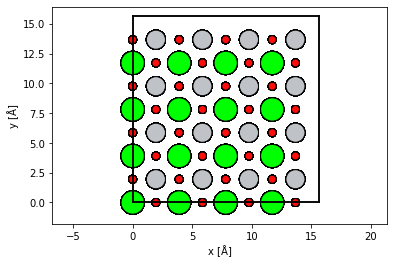

In [5]:
show_atoms(atoms)

In [6]:
potential = Potential(atoms, gpts=512, slice_thickness=2)

S1 = SMatrix(potential, energy=300e3, planewave_cutoff=20, interpolation=2, normalization='planewaves', store_on_host=False)
scan = GridScan()

image1 = S1.linear_scaling_transition_scan(scan, 20, transition_potentials, lazy=False)

  0%|          | 0/157 [00:00<?, ?it/s]

(<AxesSubplot:xlabel='x [Å]', ylabel='y [Å]'>,
 <matplotlib.image.AxesImage at 0x7fd26478b760>)

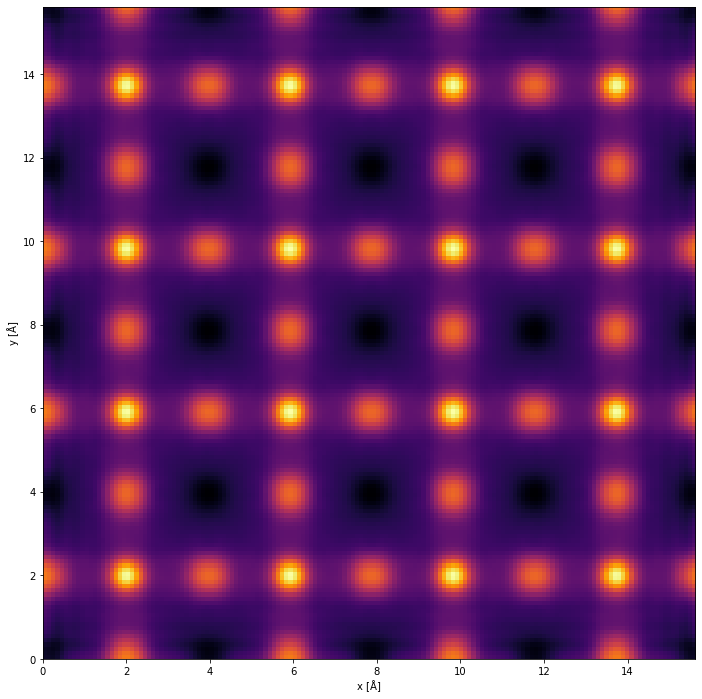

In [7]:
image1.interpolate(.1).show(figsize=(12,12), cmap='inferno')